In [52]:
!pip install wandb

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import wandb
from wandb.keras import WandbCallback

In [54]:
wandb.init(project='Weather forecasting')

epoch,▁▁▂▂▃▄▄▅▅▆▆▇▇█▁▂▂▃▄▄▅▅▆▆▇▇█▁▂▂▃▃▄▅▅▆▆▇▇█
loss,█▃▁▁▁▂▁▁▁▁▁▁▁▂▃▁▂▁▁▁▁▁▁▁▁▁▁▄▁▁▁▁▁▁▁▁▁▁▁▁
epoch,199
loss,3.17148


In [55]:
config=wandb.config
config.learning_rate=0.01

In [56]:
data=pd.read_csv('weatherHistory.csv')


In [57]:
data['Formatted Date']=pd.to_datetime(data['Formatted Date'],utc=True)
data['day']=data['Formatted Date'].dt.dayofyear
data['year'] = data['Formatted Date'].dt.year
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,day,year
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,90,2006
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,90,2006
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,91,2006
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,91,2006
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,91,2006


In [58]:
#average air temperature of each day of the year
weather=data.groupby(['day','year'])['Temperature (C)'].mean().reset_index()
weather

,day,year,Temperature (C)
0,1,2006,4.075000
1,1,2007,3.806713
2,1,2008,-5.663194
3,1,2009,-4.850926
4,1,2010,7.807407
...,...,...,...
4014,365,2015,-4.304861
4015,365,2016,0.117593
4016,366,2008,-6.218056
4017,366,2012,-3.249306


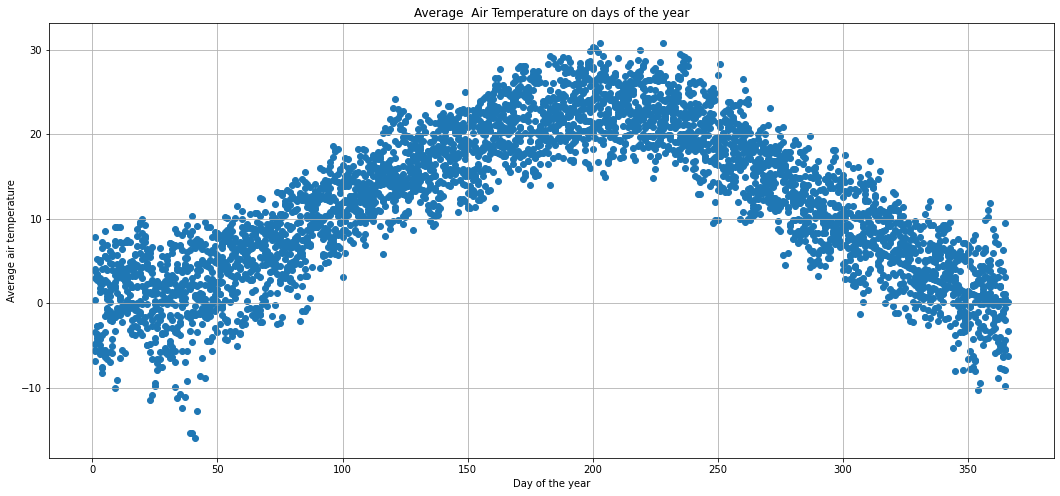

In [59]:
plt.figure(figsize=(18,8))
plt.scatter(weather['day'],weather['Temperature (C)'])
plt.xlabel('Day of the year')
plt.ylabel('Average air temperature')
plt.title('Average  Air Temperature on days of the year')
plt.grid()
plt.show()


In [60]:
X=np.array(weather['day'])
Y=np.array(weather['Temperature (C)'])
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)

In [61]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [62]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2813, 1)
(2813, 1)
(1206, 1)
(1206, 1)


In [63]:
model=tf.keras.models.Sequential([
    Dense(64,input_dim=1,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1,activation='linear')
])

In [64]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=config.learning_rate),
              loss=tf.keras.losses.MeanAbsoluteError()
)

In [65]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 64)                128       
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.fit(X_train,Y_train,epochs=250,callbacks=[WandbCallback()])

Epoch 1/250
88/88 [==============================] - 1s 3ms/step - loss: 9.1399
Epoch 2/250
88/88 [==============================] - 0s 2ms/step - loss: 7.9463
Epoch 3/250
88/88 [==============================] - 0s 2ms/step - loss: 7.4754
Epoch 4/250
88/88 [==============================] - 0s 2ms/step - loss: 7.2705
Epoch 5/250
88/88 [==============================] - 0s 5ms/step - loss: 7.0669
Epoch 6/250
88/88 [==============================] - 0s 2ms/step - loss: 7.5519
Epoch 7/250
88/88 [==============================] - 0s 2ms/step - loss: 7.2501
Epoch 8/250
88/88 [==============================] - 0s 2ms/step - loss: 6.8090
Epoch 9/250
88/88 [==============================] - 0s 2ms/step - loss: 5.5644
Epoch 10/250
88/88 [==============================] - 0s 3ms/step - loss: 4.6114
Epoch 11/250
88/88 [==============================] - 0s 2ms/step - loss: 4.4188
Epoch 12/250
88/88 [==============================] - 0s 2ms/step - loss: 3.7181
Epoch 13/250
88/88 [=================

In [67]:
model.evaluate(X_test,Y_test)

38/38 [==============================] - 0s 1ms/step - loss: 3.0217


3.021684408187866